## Mitsiu Alejandro Carreño Sarabia - E23S-18014

Considerando los cuatro archivos formato e-Book publicados en https://moodle.ucags.edu.mx/course/view.php?id=2284&section=7
Generar un Corpus con el lenguaje de programación "R", utilizando el entorno de Google Collaboratory, donde muestre las palabras de opinión negativa (idioma inglés y/o idioma español Latinoamérica), el resultado que esté en una "Data Frame" dentro del "notebook" generado.

In [1]:
%load_ext rpy2.ipython

# Habilitar la sintaxis de R

In [2]:
%%R
books_info <- list(c("secret_garden.txt","https://www.gutenberg.org/cache/epub/17396/pg17396.txt"),
                  c("s_holmes.txt","https://www.gutenberg.org/cache/epub/1661/pg1661.txt"),
                  c("r_world.txt","https://www.gutenberg.org/cache/epub/32972/pg32972.txt"),
                  c("gulliver.txt","https://www.gutenberg.org/cache/epub/65473/pg65473.txt")
                  )

books_info

[[1]]
[1] "secret_garden.txt"                                     
[2] "https://www.gutenberg.org/cache/epub/17396/pg17396.txt"

[[2]]
[1] "s_holmes.txt"                                        
[2] "https://www.gutenberg.org/cache/epub/1661/pg1661.txt"

[[3]]
[1] "r_world.txt"                                           
[2] "https://www.gutenberg.org/cache/epub/32972/pg32972.txt"

[[4]]
[1] "gulliver.txt"                                          
[2] "https://www.gutenberg.org/cache/epub/65473/pg65473.txt"



In [3]:
%%R
# Descargar cada libro
for (book_info in books_info) {
  download.file(book_info[2], book_info[1])
}

In [4]:
%%R
install.packages("tm") # Contiene Corpus
library(tm)

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpv8Hf3r/downloaded_packages’




In [5]:
%%R
# Generar corpus con todos los libros
corpus <- Corpus(DirSource(directory="."))

corpus

corpus[[1]]$content

[1] "The Project Gutenberg eBook of Gulliver's Travels\n    \nThis ebook is for the use of anyone anywhere in the United States and\nmost other parts of the world at no cost and with almost no restrictions\nwhatsoever. You may copy it, give it away or re-use it under the terms\nof the Project Gutenberg License included with this ebook or online\nat www.gutenberg.org. If you are not located in the United States,\nyou will have to check the laws of the country where you are located\nbefore using this eBook.\n\nTitle: Gulliver's Travels\n\n\nAuthor: Jonathan Swift\n\nIllustrator: Milo Winter\n\nRelease date: May 31, 2021 [eBook #65473]\n\nLanguage: English\n\nCredits: Juliet Sutherland and the Online Distributed Proofreading Team at https://www.pgdp.net\n\n\n*** START OF THE PROJECT GUTENBERG EBOOK GULLIVER'S TRAVELS ***\n\n\n\n\n\n[Illustration: “_I found my arms and legs were strongly fastened on each\nside to the ground_”\n\n_Page 8_]\n\n\n\n\n                          THE WINDERMERE S

In [6]:
%%R
# Transformar texto a minúsculas
corpus <- tm_map(corpus, content_transformer(tolower))
# Limpiar signos de puntuación
corpus <- tm_map(corpus, removePunctuation)
# Limpiar números
corpus <- tm_map(corpus, removeNumbers)
# Limpiar stopwords de ingles
corpus <- tm_map(corpus, removeWords,stopwords("en"))

In [7]:
%%R
install.packages("tidytext") # Analisis de textos
library(tidytext)

install.packages("ggplot2") # Herramienta de graficación
library(ggplot2)

install.packages("magrittr")
library(magrittr) # necesario para usar %>%

install.packages("dplyr")  # Contiene tibble
library(dplyr)


(as ‘lib’ is unspecified)







	‘/tmp/Rtmpv8Hf3r/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpv8Hf3r/downloaded_packages’

Attaching package: ‘ggplot2’



    annotate


(as ‘lib’ is unspecified)







	‘/tmp/Rtmpv8Hf3r/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpv8Hf3r/downloaded_packages’

Attaching package: ‘dplyr’



    filter, lag



    intersect, setdiff, setequal, union




In [8]:
%%R
# Usamos el lexico de bing para clasificar positivo o negativo
bing <- tidytext::get_sentiments("bing")

In [9]:
%%R
# Transformamos de caracteres a tibble
text_df <- tibble(text = corpus$content)

In [10]:
%%R
# Aplicamos la clasificacion de bing al texto
text_df_bing <- text_df %>%
  unnest_tokens(word, text) %>%
  inner_join(bing, by = "word")

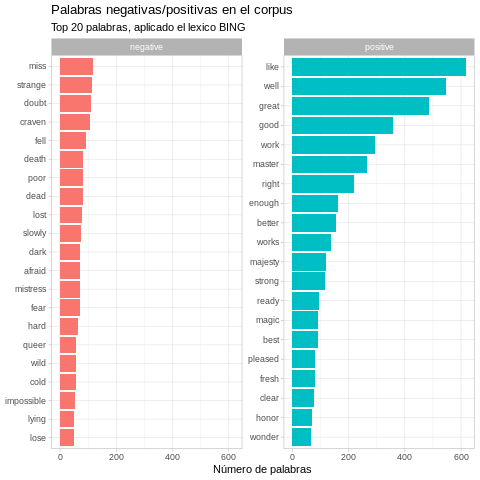

In [11]:
%%R
# Graficamos el top 20 de nuestra clasificación
text_df_bing %>%
  count(word, sentiment, sort=TRUE) %>%
  group_by(sentiment) %>%
  slice_max(n, n=20) %>%
  ungroup() %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(n, word, fill = sentiment)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~sentiment, scales = "free_y") +
  theme_light() +
  labs(title = "Palabras negativas/positivas en el corpus",
       subtitle = "Top 20 palabras, aplicado el lexico BING",
       x = "Número de palabras",
       y=NULL)